# PMSM Exploratory Data Analysis 

The heat loss and cooling modes of a permanent magnet synchronous motor (PMSM) directly affect the its temperature rise. The accurate evaluation and prediction of stator winding temperature is of great significance to the safety and reliability of PMSMs. In order to study the influencing factors of stator winding temperature and prevent motor insulation ageing, insulation burning, permanent magnet demagnetization and other faults caused by high stator winding temperature, we propose a computer model for PMSM temperature prediction. Ambient temperature, coolant temperature, direct-axis voltage, quadrature-axis voltage, motor speed, torque, direct-axis current, quadrature-axis current, permanent magnet surface temperature, stator yoke temperature, and stator tooth temperature are taken as the input, while the stator winding temperature is taken as the output.
!
[image.png](attachment:image.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#getting dataset
data=pd.read_csv("pmsm_temperature_data.csv")
data.head(10)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
5,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-0.246341,-2.522203,-1.831931,-2.062549,-2.017884,4
6,-0.749228,-1.116170,0.335014,-1.302082,-1.222430,-0.247914,1.030493,-0.246162,-2.522538,-1.833012,-2.062115,-2.017243,4
7,-0.738450,-1.113986,0.336256,-1.305155,-1.222432,-0.248321,1.030107,-0.246035,-2.522844,-1.832182,-2.061953,-2.017213,4
8,-0.730910,-1.111828,0.334905,-1.303790,-1.222431,-0.247785,1.029851,-0.245981,-2.522808,-1.831576,-2.062443,-2.017739,4
9,-0.727130,-1.109486,0.335988,-1.305633,-1.222431,-0.248294,1.029636,-0.245888,-2.522677,-1.831438,-2.062317,-2.018180,4


Ambient - temperature around stator ;
coolant - motor coolant temperature ;
u_d - voltage of d component ;
u_q - voltage of d component ;
motor_speed - ambient temperature around stator ;
torque - of motor ;
i_d - current measure of d component ;
i_q - current measure of d component ;
pm - permanent magnet temperature ;
stator_yoke - stator yoke temperature ;
stator_tooth - stator tooth temperature ;
stator_winding - stator winding temperature ;


In [4]:
data.shape

(998070, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
data.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


##Lifecycle of Data Science Project
1->Data Analysis
2->Feature Engineering
3->Feature Selection
4->Model Building
5->Model Deployment

#Data Analysis:
1->Missing Values
2->All the Numeric Values
3->Distribution of Numerical Data
4->Categorical data
5->Cardinality of Categorical Variables
6->Outliers
7->Relationship between independent and dependent feature 



In [7]:
#1->Missing Values
data.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

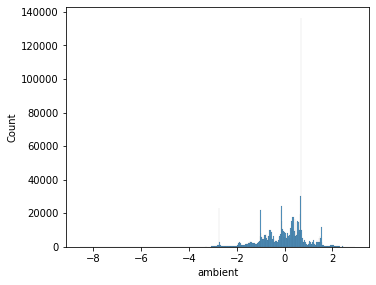

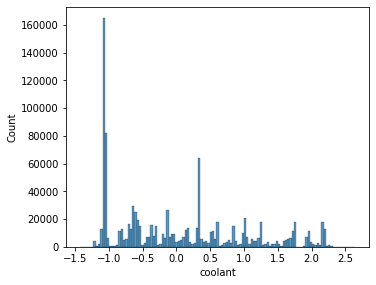

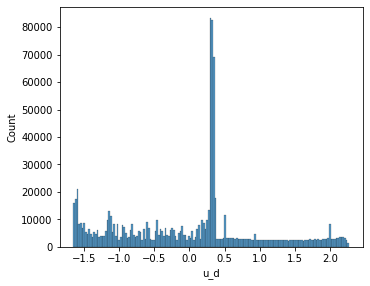

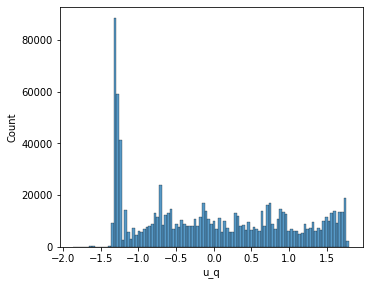

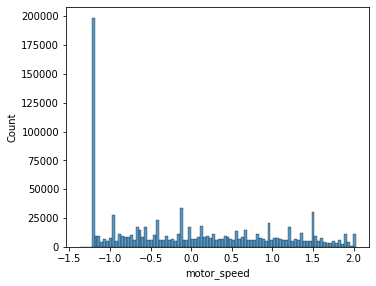

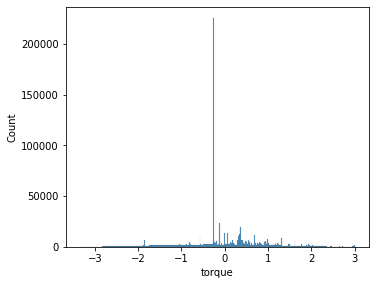

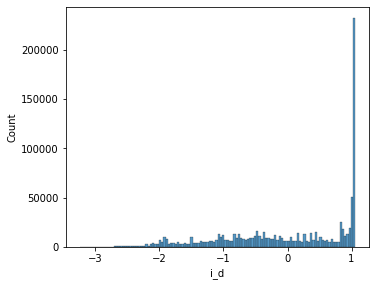

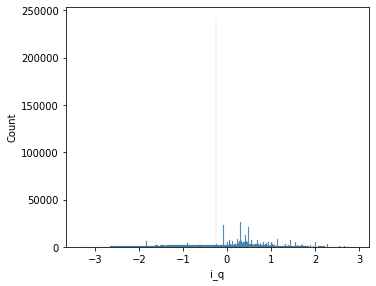

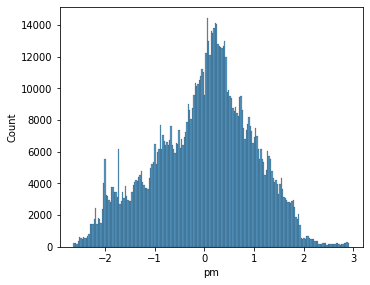

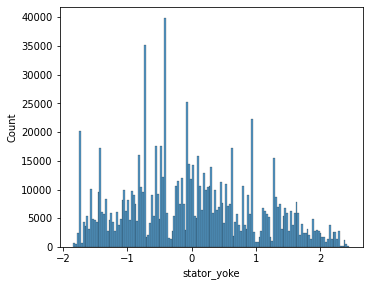

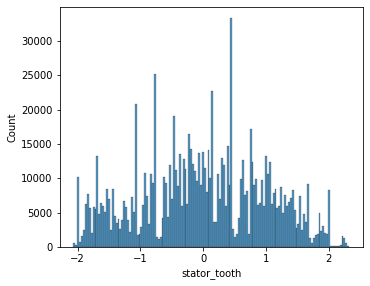

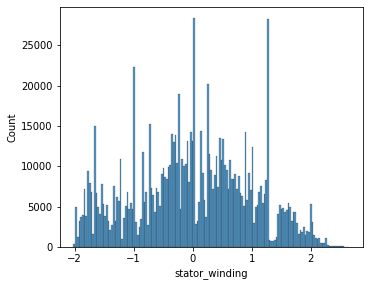

In [8]:
#2->All the Numeric Values
#Lets look into each column one by one - Univariate Analysis
datax=data.drop(labels="profile_id",axis=1)

for i in range(len(datax.columns)):
    plt.figure(figsize=(25,15))
    plt.subplot(3,4,i+1)
    sns.histplot(datax[datax.columns[i]])
    plt.show
    

# Obervations
Ambient temperature > negative skewed data, maximum data ranges from 0 - 1.2(Degree celcius) temperature
Coolant temperature > Postive skewed data, cooling temperature ranges nearly 1-1.5 (Degree celcius) temperature which is quite for stator to balance the temperature
U_D > Voltage on Component d, is normally distributed data 
U_Q > Voltage on Component q, is positively skewed data 
Motor speed > is positively skewed data 
torque > Normalized but leptokurtic data
i_d > current measured is a negative skewed data
i_q > normally distributed data
pm > magnet temperature is completely normalized data
Stator yoke, winding and tooth - are slightly skewed data


# Multivariate Analysis

<Figure size 1440x936 with 0 Axes>

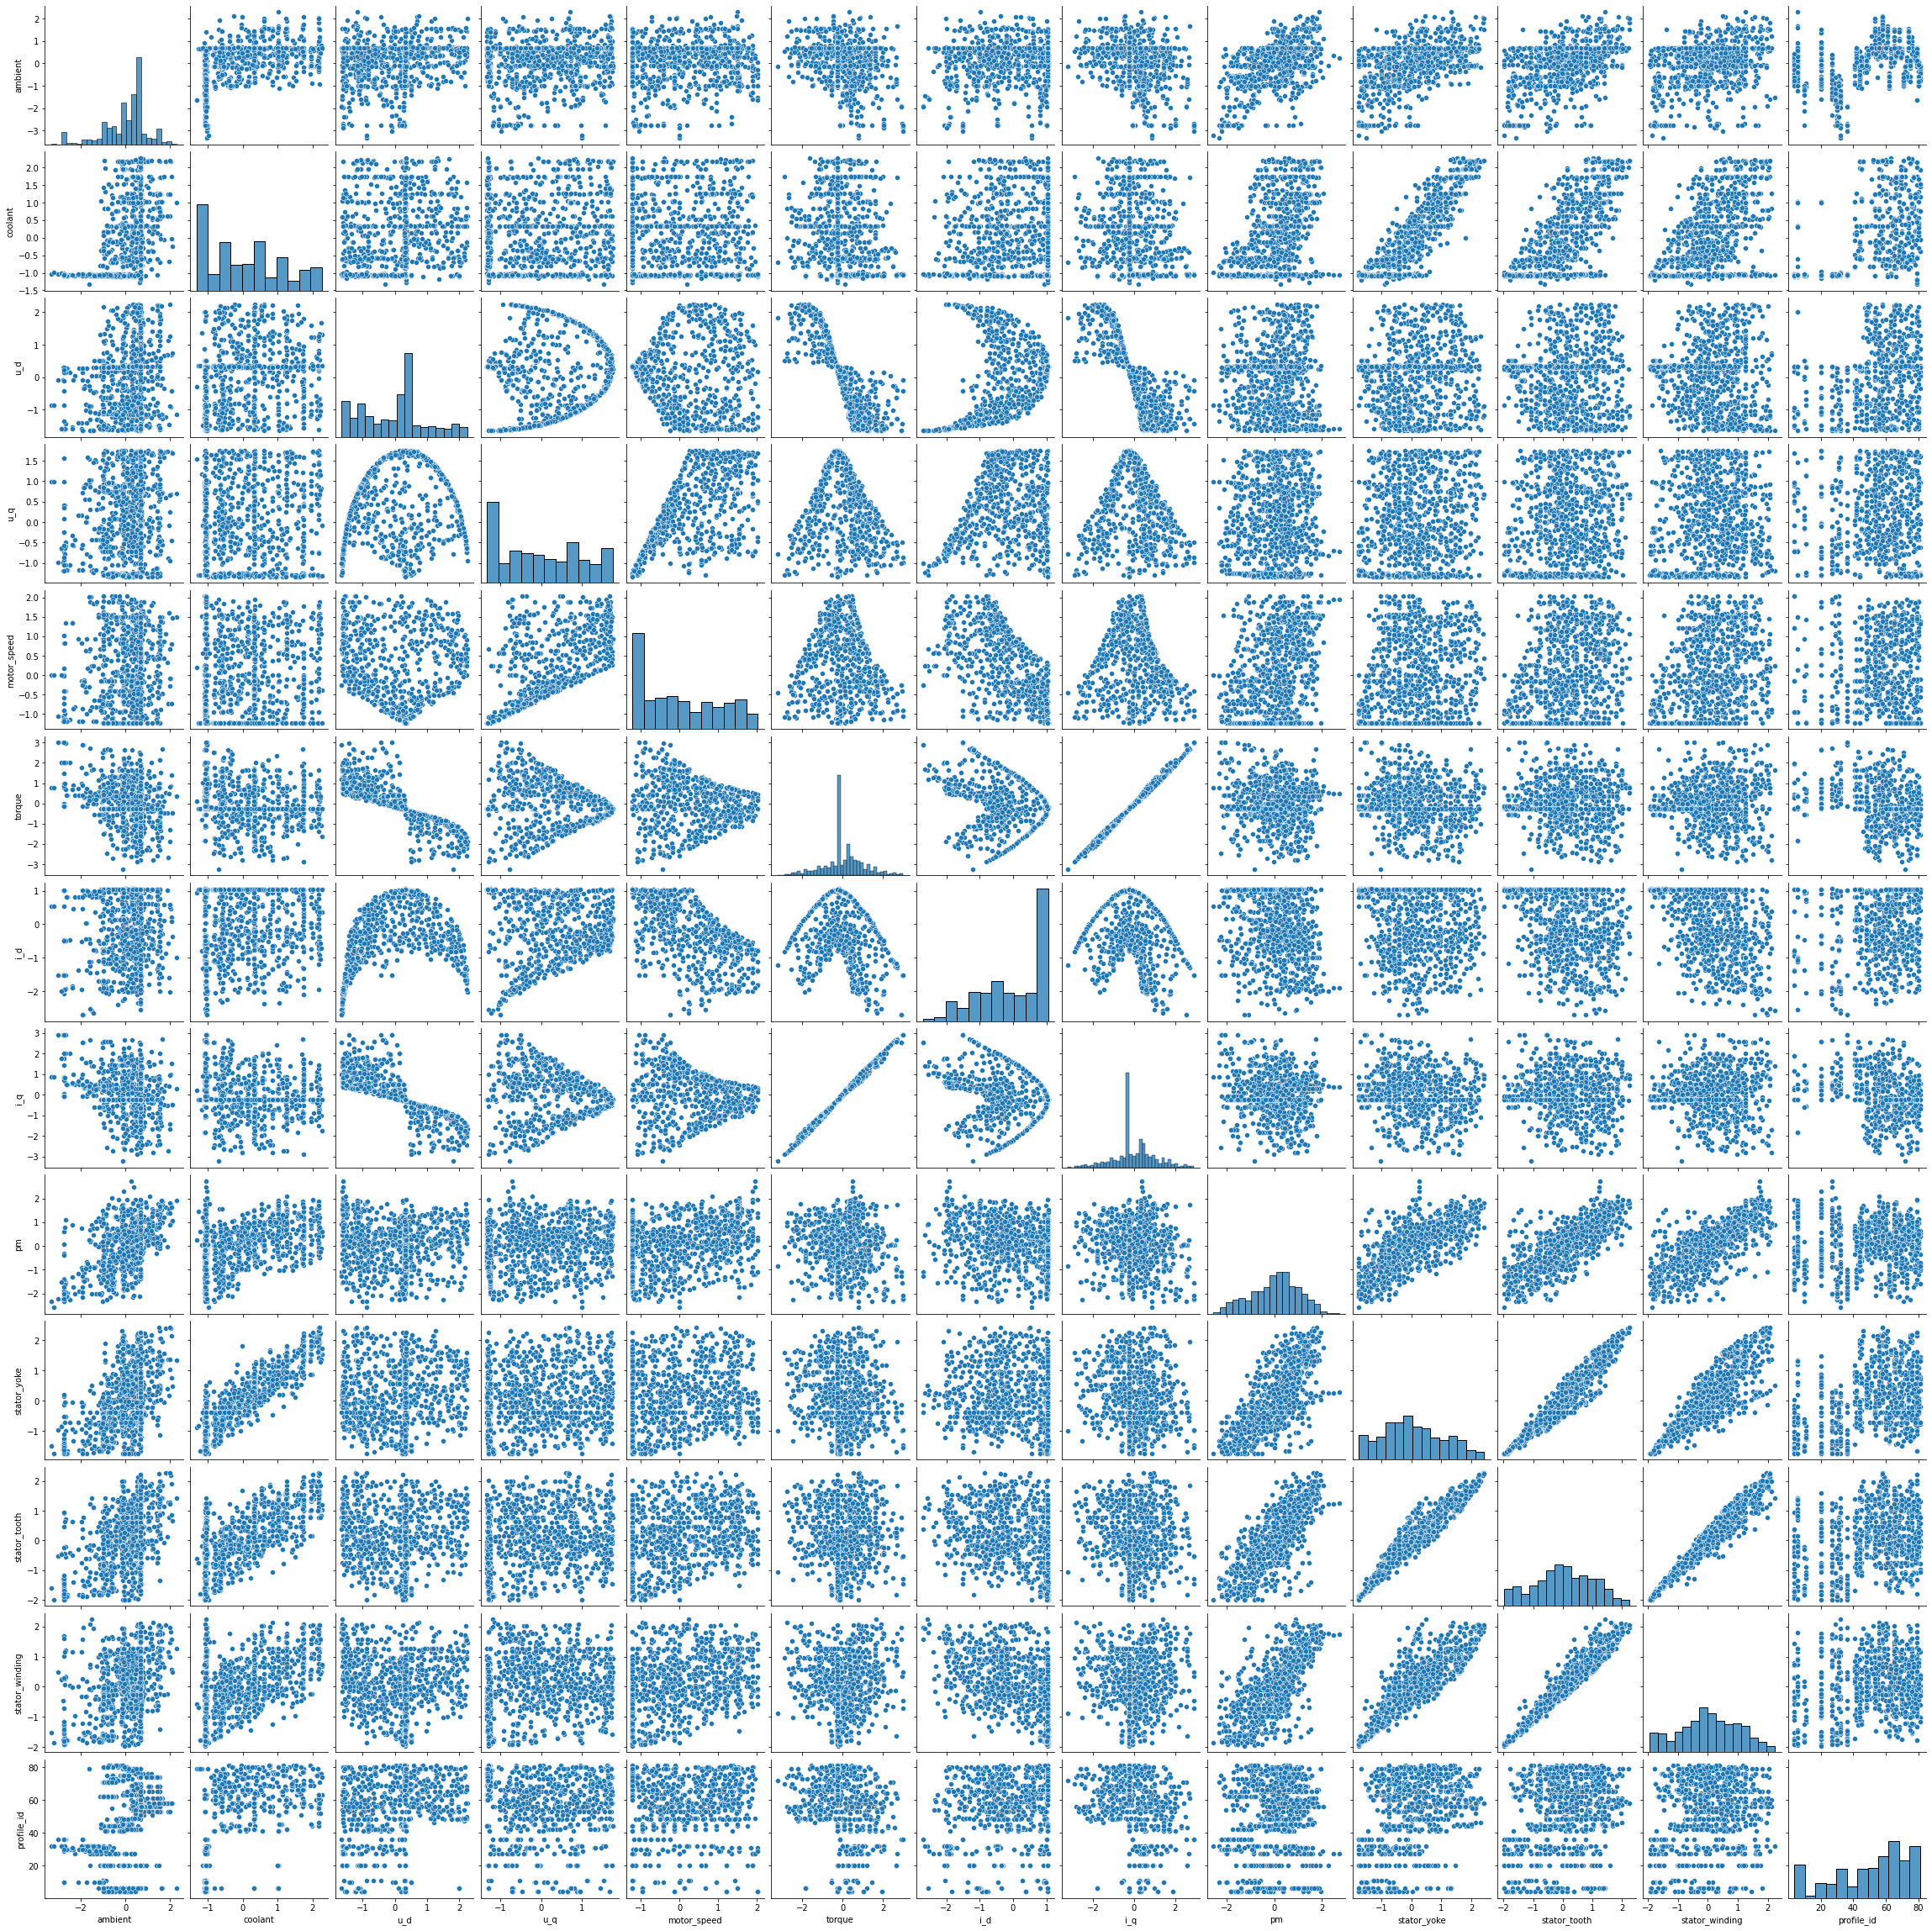

In [9]:
plt.figure(figsize=(20,13))
sns.pairplot(data.sample(1000))
plt.show()

# Observations:
## Torque and current in q-component are very much correlated, there is a exponensial raise between these
## Coolant temperature, Permanent magnet temperature - both have a monotonic relationship between stator yoke, stator tooth, similarly we can say that stator yoke, stator tooth and stator winding have monotonic relationship.
## voltage of q or Current of q component gradually increases and decreases after reaching Mean of torque (Leptokurtic curve)
## will find the strength and dimension of correlation later with these observations



# Outliers


C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python310\lib\site-packages\seaborn\

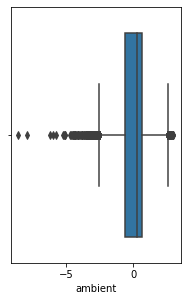

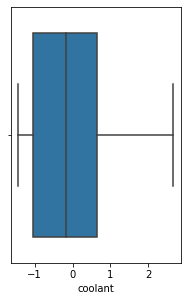

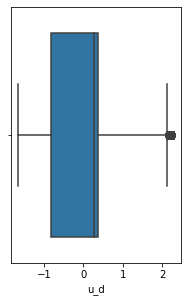

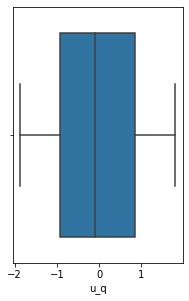

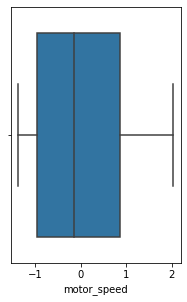

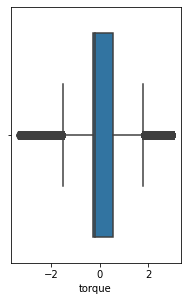

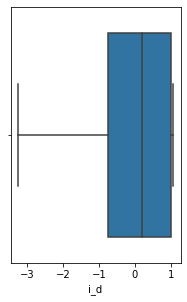

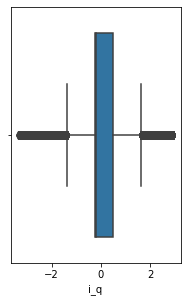

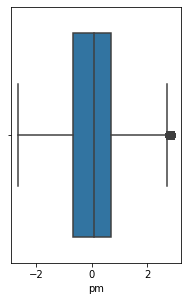

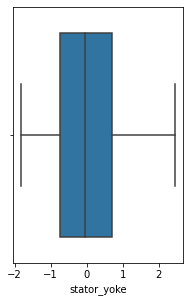

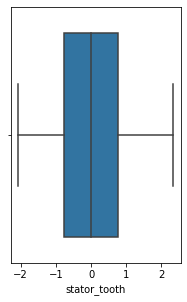

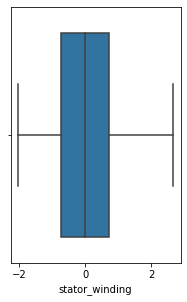

In [10]:
for i in range(len(datax.columns)):
    plt.figure(figsize=(14,16))
    plt.subplot(3,4,i+1)
    sns.boxplot(datax[datax.columns[i]])
    plt.show


## From Box plot, outliers are in 
### 1>ambient
### 2>u_d
### 3>torque
### 4>i_q
### 5>pm


In [11]:
#finding outliers and its count using IQR(Interquartile Range)-methods
outliers_data=data[["ambient","u_d","torque","i_q","pm"]].copy()
outliers_data


,ambient,u_d,torque,i_q,pm
0,-0.752143,0.327935,-0.250182,-0.245860,-2.522071
1,-0.771263,0.329665,-0.249133,-0.245832,-2.522418
2,-0.782892,0.332771,-0.249431,-0.245818,-2.522673
3,-0.780935,0.333700,-0.248636,-0.246955,-2.521639
4,-0.774043,0.335206,-0.248701,-0.246610,-2.521900
...,...,...,...,...,...
998065,-0.047497,0.331475,-0.255640,-0.245723,0.429853
998066,-0.048839,0.331701,-0.255640,-0.245736,0.429751
998067,-0.042350,0.330946,-0.255640,-0.245701,0.429439
998068,-0.039433,0.330987,-0.255640,-0.245727,0.429558


In [12]:
def iqr(feature):
    list1=sorted(feature)
    list2=[]
    quartile1,quartile3=np.percentile(list1,[25,75])
    iqr_value=quartile3-quartile1
    lower_bound=quartile1-(iqr_value*1.5)
    upper_bound=quartile3+(iqr_value*1.5)
    for x in list1:
        if not(x>=lower_bound and x<=upper_bound):
            list2.append(x)
    return list2
        
    
    

In [13]:
outliers={}
#outliers["ambient"]=iqr(outliers_data["ambient"].values)
for x in ["ambient","u_d","torque","i_q","pm"]:
    outliers[x]=iqr(outliers_data[x].values)
print("Number of outliers:")
for x,y in outliers.items():
    print(x,":",len(y))

Number of outliers:
ambient : 38492
u_d : 18050
torque : 127303
i_q : 148535
pm : 1501


## Since the numbers are quite huge for torque and i_q we will try to normalize the data and use in our model

In [37]:
#Z-score normalization
from sklearn.preprocessing import MinMaxScaler
norm_data=MinMaxScaler()
##Will normalize ambient,torque,pm,u_d,i_q data which has outliers, 
##also normalize voltage and current columns which would help us in feature selection
norm_data=norm_data.fit_transform(datax[["ambient","pm","torque","u_d","u_q","i_d","i_q"]])
norm_data=pd.DataFrame(norm_data,columns=["ambient","pm","torque","u_d","u_q","i_d","i_q"])
norm_data

,ambient,pm,torque,u_d,u_q,i_d,i_q
0,0.677737,0.019807,0.486533,0.504645,0.154203,0.992717,0.494864
1,0.676080,0.019745,0.486698,0.505085,0.154250,0.992703,0.494868
2,0.675073,0.019699,0.486651,0.505875,0.153118,0.992688,0.494870
3,0.675242,0.019885,0.486776,0.506112,0.153110,0.993477,0.494689
4,0.675840,0.019838,0.486766,0.506495,0.152764,0.993236,0.494744
...,...,...,...,...,...,...,...
998065,0.738793,0.551739,0.485675,0.505545,0.168360,0.992617,0.494886
998066,0.738676,0.551720,0.485675,0.505603,0.167118,0.992619,0.494883
998067,0.739239,0.551664,0.485675,0.505411,0.168158,0.992629,0.494889
998068,0.739491,0.551685,0.485675,0.505421,0.167432,0.992619,0.494885


In [38]:
for x in ["ambient","pm","torque","u_d","u_q","i_d","i_q"]:
    datax[x]=norm_data[x]
datax

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,0.677737,-1.118446,0.504645,0.154203,-1.222428,0.486533,0.992717,0.494864,0.019807,-1.831422,-2.066143,-2.018033
1,0.676080,-1.117021,0.505085,0.154250,-1.222429,0.486698,0.992703,0.494868,0.019745,-1.830969,-2.064859,-2.017631
2,0.675073,-1.116681,0.505875,0.153118,-1.222428,0.486651,0.992688,0.494870,0.019699,-1.830400,-2.064073,-2.017343
3,0.675242,-1.116764,0.506112,0.153110,-1.222430,0.486776,0.993477,0.494689,0.019885,-1.830333,-2.063137,-2.017632
4,0.675840,-1.116775,0.506495,0.152764,-1.222429,0.486766,0.993236,0.494744,0.019838,-1.830498,-2.062795,-2.018145
...,...,...,...,...,...,...,...,...,...,...,...,...
998065,0.738793,0.341638,0.505545,0.168360,-1.222428,0.485675,0.992617,0.494886,0.551739,1.018568,0.836084,0.494725
998066,0.738676,0.320022,0.505603,0.167118,-1.222437,0.485675,0.992619,0.494883,0.551720,1.013416,0.834438,0.494279
998067,0.739239,0.307415,0.505411,0.168158,-1.222430,0.485675,0.992629,0.494889,0.551664,1.002906,0.833936,0.492666
998068,0.739491,0.302082,0.505421,0.167432,-1.222432,0.485675,0.992619,0.494885,0.551685,0.999157,0.830504,0.490581


# Feature Selection


## Correlations

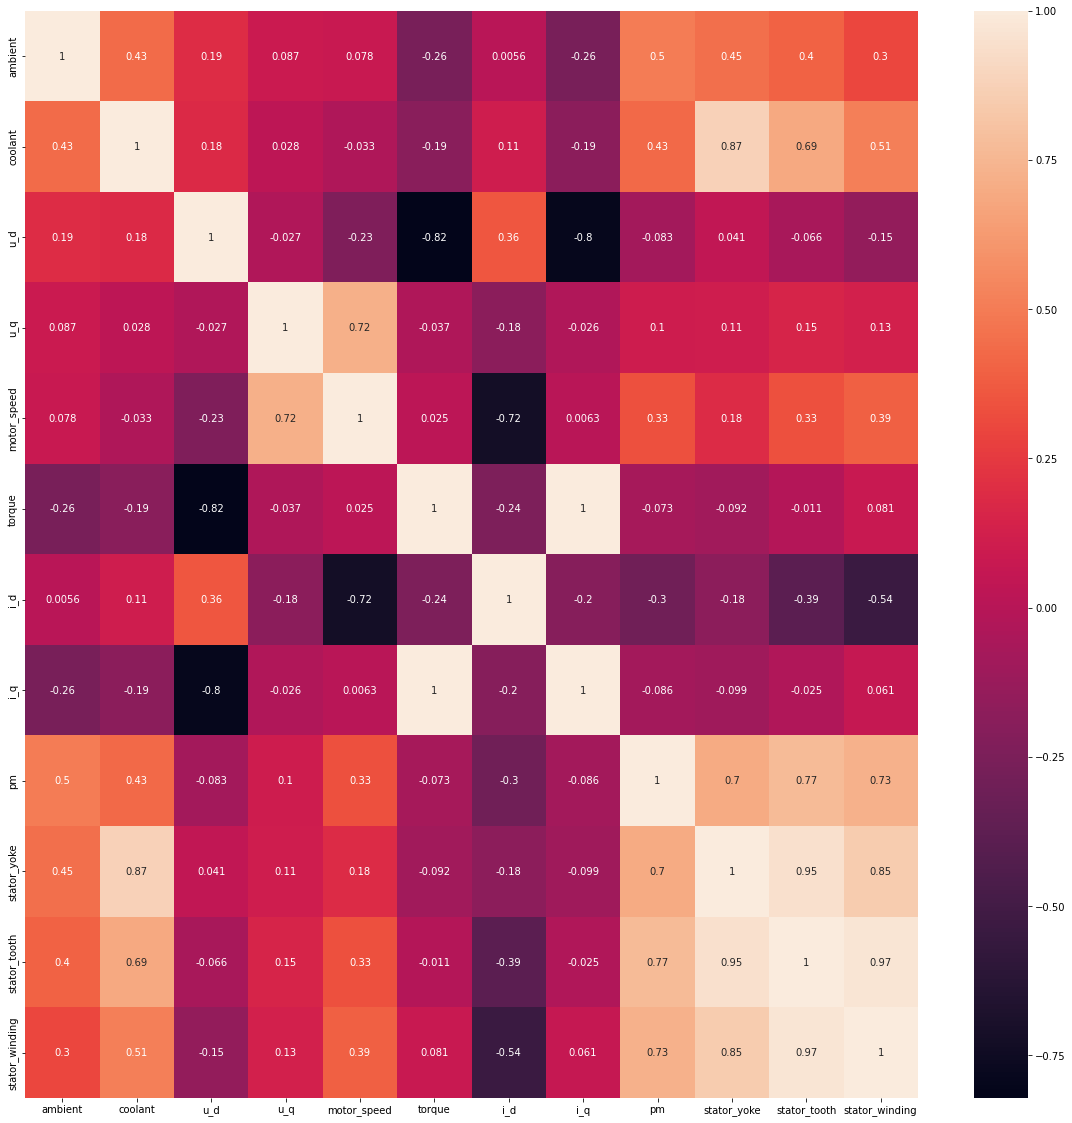

In [42]:
plt.figure(figsize=(20,20))
correlations=datax.corr(method="pearson")
sns.heatmap(correlations,annot=True)
plt.show()

# As stated in Multivariate Aanlysis, 
## Torque>i_q
## Pm>stator_yoke,stator_tooth,stator_winding 
## are very much correlated.
## We can say that the temperature of pm can be directly depends on stator_yoke,stator_tooth,stator_winding 

# 
# Model Building
## Since we are going to predict stator_winding temperature, we can use linear regression for this model.


In [71]:
#Splitting Train and Test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(datax.iloc[:,0:-1],datax.iloc[:,-1],test_size=0.25,random_state=3)

In [72]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [73]:
print("Score:",model.score(x_train,y_train))

Score: 0.9943248478851637


In [74]:
#model for test
model.fit(x_test,y_test)
print("Score:",model.score(x_test,y_test))

Score: 0.9942927251279138


In [75]:
from sklearn.metrics import r2_score
y_pred=model.predict(x_test)
print("R2 for this model:",r2_score(y_test,y_pred))

R2 for this model: 0.9942927251279138


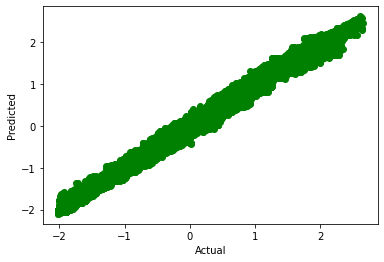

In [77]:
plt.scatter(y_test,y_pred,color="g")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# Conclusion:
## Our model really predicts well with 99% of accuracy on 75% on train and 25% on test data